In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles

In [12]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tugas_projek/srilanka_dataset/monthly_consumption.csv')
df

,household_ID,month,consumption
0,ID0001,2022-10-31,116
1,ID0001,2022-11-30,120
2,ID0001,2022-12-31,129
3,ID0001,2023-01-31,102
4,ID0001,2023-02-28,115
...,...,...,...
101570,ID4063,2024-06-30,167
101571,ID4063,2024-07-31,178
101572,ID4063,2024-08-31,165
101573,ID4063,2024-09-30,124


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101575 entries, 0 to 101574
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   household_ID  101575 non-null  object
 1   month         101575 non-null  object
 2   consumption   100985 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [14]:
df.describe().T

,count,unique,top,freq
household_ID,101575,4063,ID0001,25
month,101575,25,2022-10-31,4063
consumption,100985,1134,0,2332


#1.Cleaning Data

In [15]:
print(df['month'].nunique())
df['month'].unique()

25


array(['2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
       '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
       '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
       '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
       '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
       '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
       '2024-10-31'], dtype=object)

In [16]:
print(df['household_ID'].nunique())
df['household_ID'].unique()

4063


array(['ID0001', 'ID0002', 'ID0003', ..., 'ID4061', 'ID4062', 'ID4063'],
      dtype=object)

In [17]:
df.describe().T

,count,unique,top,freq
household_ID,101575,4063,ID0001,25
month,101575,25,2022-10-31,4063
consumption,100985,1134,0,2332


In [18]:
df.isna().sum()

,0
household_ID,0
month,0
consumption,590


In [19]:
df.dropna()

,household_ID,month,consumption
0,ID0001,2022-10-31,116
1,ID0001,2022-11-30,120
2,ID0001,2022-12-31,129
3,ID0001,2023-01-31,102
4,ID0001,2023-02-28,115
...,...,...,...
101570,ID4063,2024-06-30,167
101571,ID4063,2024-07-31,178
101572,ID4063,2024-08-31,165
101573,ID4063,2024-09-30,124


In [20]:
# konversi tanggal ke date time format
df['month'] = pd.to_datetime(df['month'], errors='coerce')
# konversi data tipe ke numberic
df['consumption'] = pd.to_numeric(df['consumption'], errors='coerce')


In [21]:
# filter NaN dan membuat median
median_consumption = df['consumption'].median()
df.fillna({'consumption' : median_consumption}, inplace=True)



In [22]:
df.isna().sum()

,0
household_ID,0
month,0
consumption,0


In [23]:
# filter untuk data outlier
Q1 = df['consumption'].quantile(0.25)
Q3 = df['consumption'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

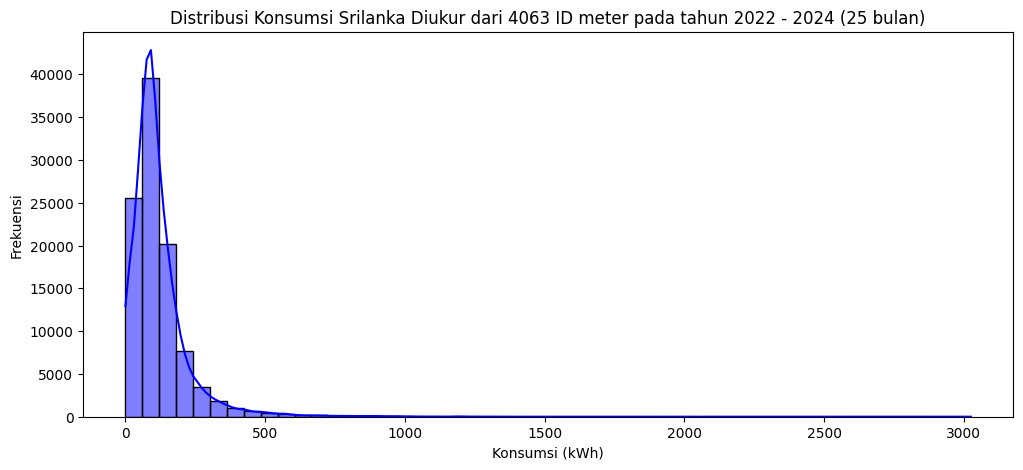

In [24]:
# Visualizing distribution before replacing outliers
plt.figure(figsize=(12, 5))
sns.histplot(df['consumption'], bins=50, kde=True, color='blue')
plt.title('Distribusi Konsumsi Srilanka Diukur dari 4063 ID meter pada tahun 2022 - 2024 (25 bulan)')
plt.xlabel('Konsumsi (kWh)')
plt.ylabel('Frekuensi')
plt.show()


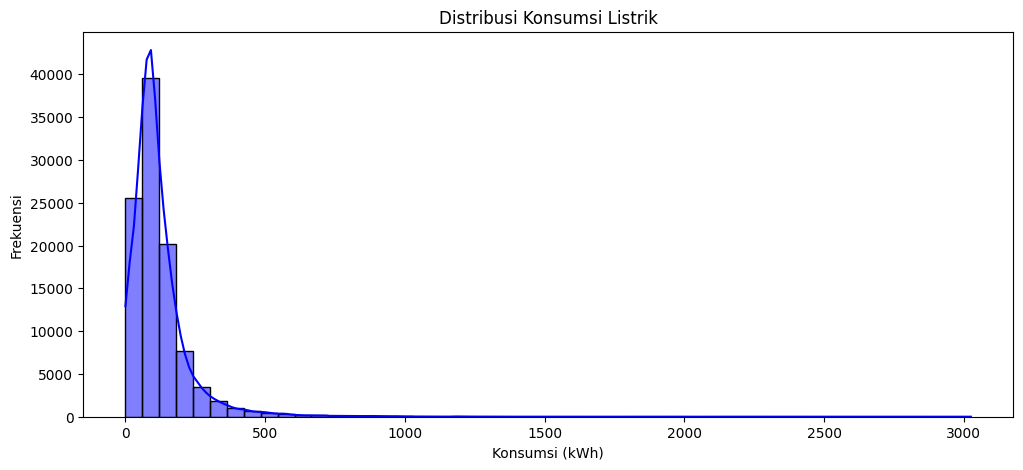

In [25]:
# Visualisasi distribusi konsumsi listrik
plt.figure(figsize=(12, 5))
sns.histplot(df['consumption'], bins=50, kde=True, color='blue')
plt.title('Distribusi Konsumsi Listrik')
plt.xlabel('Konsumsi (kWh)')
plt.ylabel('Frekuensi')
plt.show()


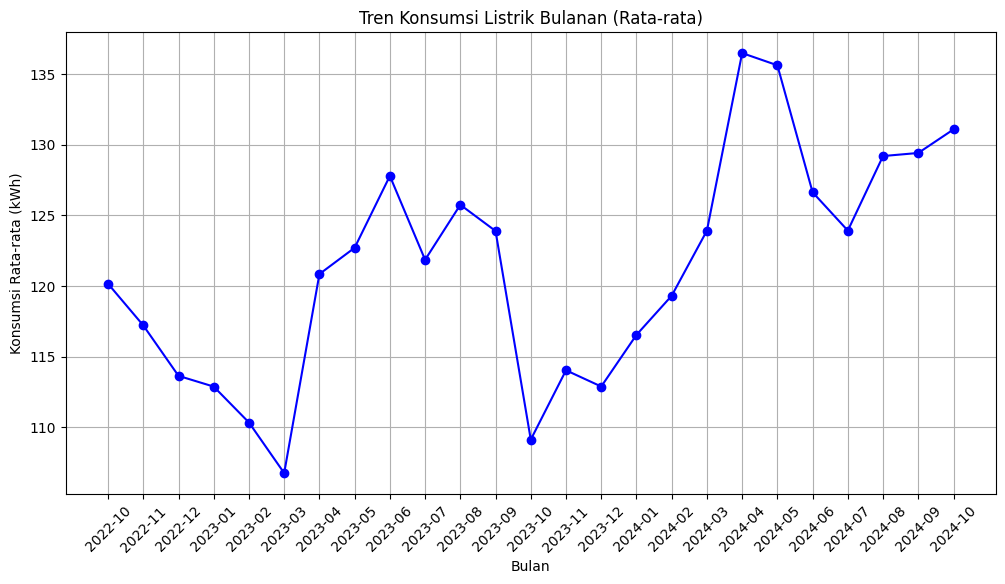

In [26]:
# Konversi 'month' ke format datetime
df['month'] = pd.to_datetime(df['month'])

# Menghitung konsumsi rata-rata per bulan
monthly_avg = df.groupby(df['month'].dt.to_period('M'))['consumption'].mean()

# Plot tren konsumsi listrik bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, marker='o', linestyle='-', color='blue')

# Label & judul
plt.xlabel('Bulan')
plt.ylabel('Konsumsi Rata-rata (kWh)')
plt.title('Tren Konsumsi Listrik Bulanan (Rata-rata)')
xtics = monthly_avg.index[::6]
plt.xticks(rotation=45)
plt.grid(True)

# Tampilkan plot
plt.show()

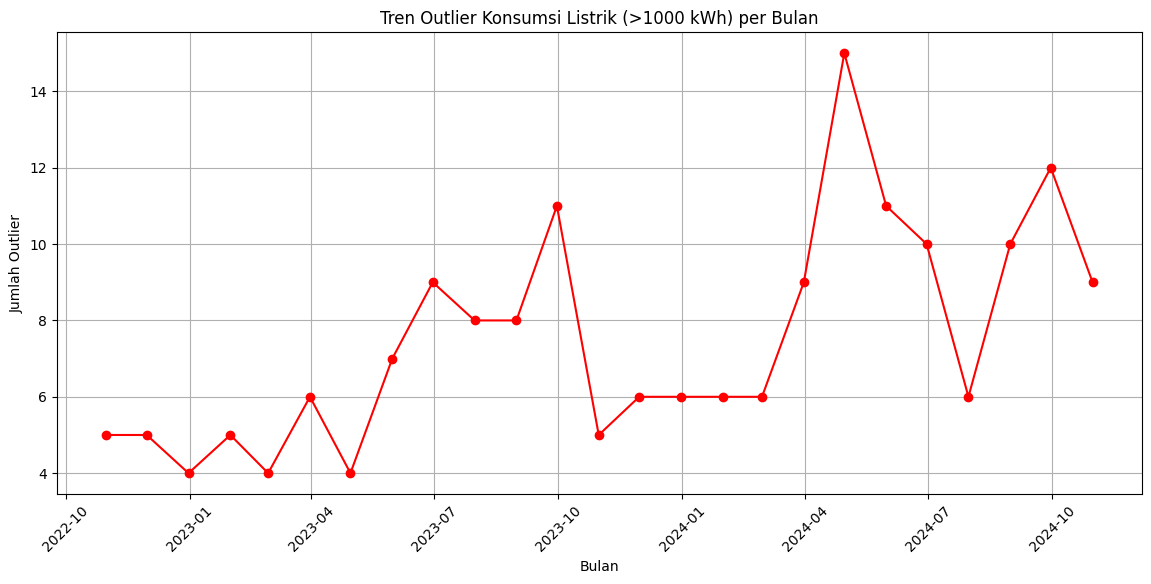

,0
month,
2024-04-30,15
2024-09-30,12
2024-05-31,11
2023-09-30,11
2024-08-31,10


In [27]:
# Identifikasi outlier sebagai konsumsi di atas 1000 kWh
outlier_data = df[df['consumption'] > 1000]

# Hitung jumlah outlier per bulan
outlier_trend = outlier_data.groupby('month').size()

# Plot tren outlier per bulan
plt.figure(figsize=(14, 6))
plt.plot(outlier_trend.index, outlier_trend.values, marker='o', linestyle='-', color='red')
plt.title('Tren Outlier Konsumsi Listrik (>1000 kWh) per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Outlier')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menampilkan bulan dengan jumlah outlier terbanyak
outlier_trend.sort_values(ascending=False).head(5)

## Pendekatan Machine Learning untuk mengetahui karakteristik pelanggan di srilanka

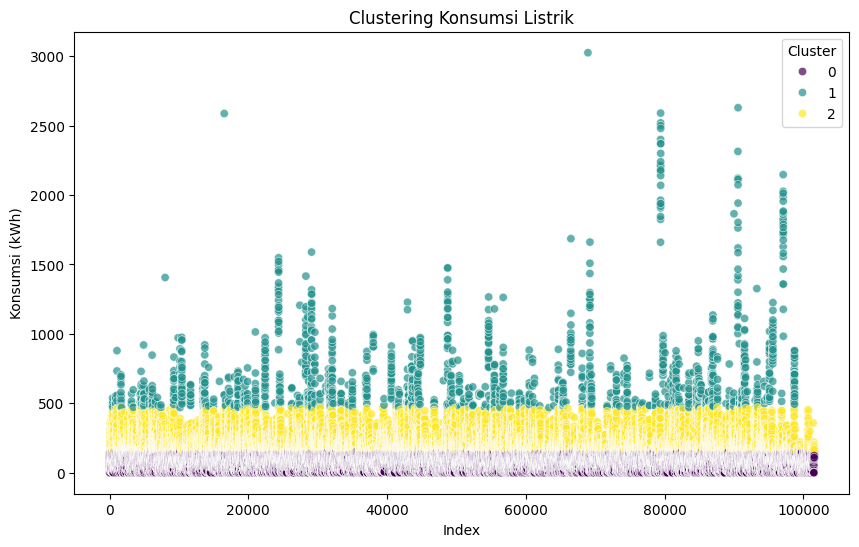

In [28]:
# Clustering visualization using K-Means
X = df[['consumption']].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.arange(len(df)), y=df['consumption'], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title('Clustering Konsumsi Listrik')
plt.xlabel('Index')
plt.ylabel('Konsumsi (kWh)')
plt.legend(title='Cluster')
plt.show()

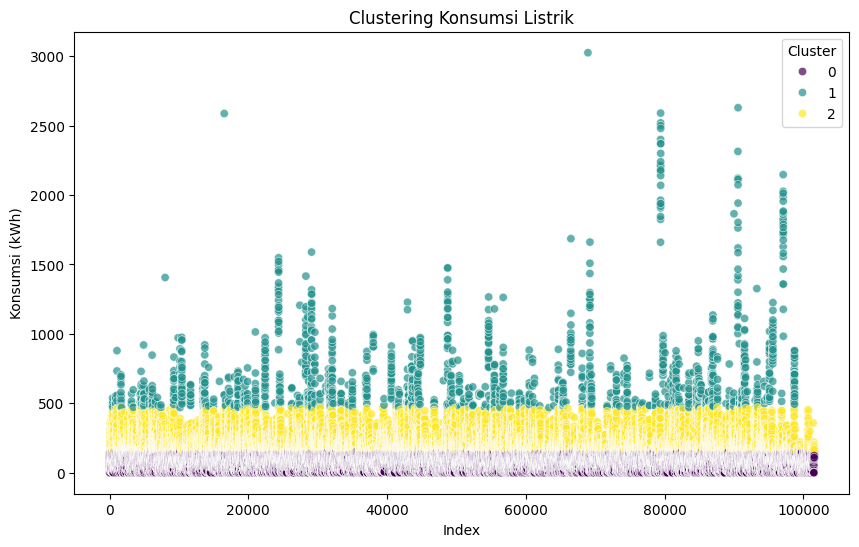

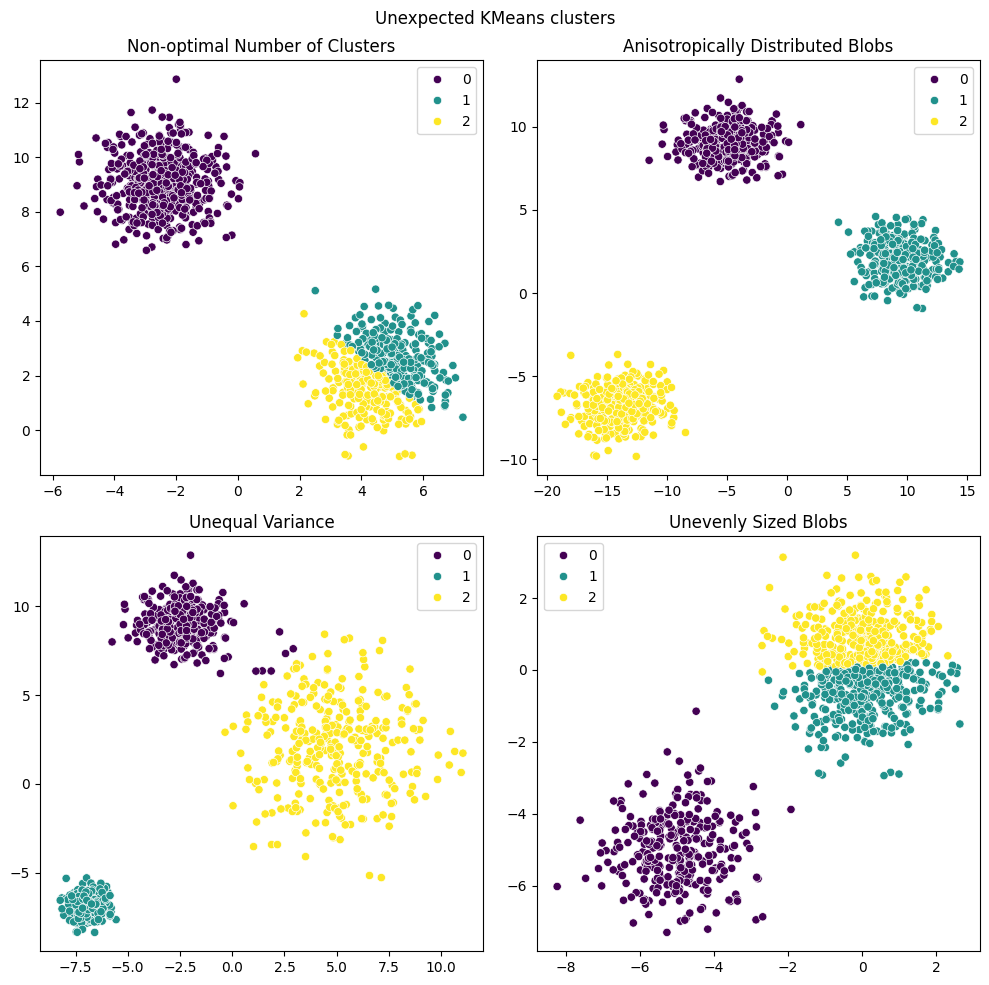

In [29]:
# Clustering visualization using K-Means
X = df[['consumption']].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.arange(len(df)), y=df['consumption'], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title('Clustering Konsumsi Listrik')
plt.xlabel('Index')
plt.ylabel('Konsumsi (kWh)')
plt.legend(title='Cluster')
plt.show()

# Generate synthetic clustering examples
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Unexpected KMeans clusters')

# Non-optimal Number of Clusters
X1, y1 = make_blobs(n_samples=1000, centers=2, random_state=42)
kmeans1 = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred1 = kmeans1.fit_predict(X1)
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=y_pred1, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Non-optimal Number of Clusters')

# Anisotropically Distributed Blobs
X2, y2 = make_blobs(n_samples=1000, centers=3, random_state=42)
X2[:, 0] *= 2  # Stretch the data
y_pred2 = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X2)
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=y_pred2, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Anisotropically Distributed Blobs')

# Unequal Variance
X3, y3 = make_blobs(n_samples=1000, cluster_std=[1.0, 2.5, 0.5], centers=3, random_state=42)
y_pred3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X3)
sns.scatterplot(x=X3[:, 0], y=X3[:, 1], hue=y_pred3, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Unequal Variance')

# Unevenly Sized Blobs
X4, y4 = make_blobs(n_samples=[300, 700], centers=[(-5, -5), (0, 0)], random_state=42)
y_pred4 = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X4)
sns.scatterplot(x=X4[:, 0], y=X4[:, 1], hue=y_pred4, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Unevenly Sized Blobs')

plt.tight_layout()
plt.show()


## Verfikasi Data (Part 2)
Menggabungkant terlebih dahulu dataset lain untuk pola konsumsi interval setiap 6 jam


In [30]:
#file_paths = [
#    "/content/drive/My Drive/collab/tugas_projek/smart_6hour_1.csv",
#    "/content/drive/MyDrive/collab/tugas_projek/smart_6hour_2.csv",
#    "/content/drive/MyDrive/collab/tugas_projek/smart_6hour_3.csv",
#    "/content/drive/MyDrive/collab/tugas_projek/smart_6hour_4.csv"
#]

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tugas_projek/srilanka_dataset/smart_6hour_1.csv')
df.head()

<ipython-input-30-ba23ca4919b6>:8: DtypeWarning: Columns (9,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tugas_projek/srilanka_dataset/smart_6hour_1.csv')


,household_ID,BRANCH,DEPOT,substation_ID,SUB_TYPE,E_BILLING,EXPORT,DATE,TIME,TOTAL_IMPORT (kWh),...,TR1_TOTAL_EXPORT - PV1 (kWh),TR2_TOTAL_EXPORT - PV1 (kWh),TR3_TOTAL_EXPORT - PV1 (kWh),PHASE_A_CURRENT (A),PHASE_A_VOLTAGE (V),FREQUENCY (Hz),PHASE_B_CURRENT (A),PHASE_B_VOLTAGE (V),PHASE_C_CURRENT (A),PHASE_C_VOLTAGE (V)
0,ID5111,MORATUWA,MORATUWA NORTH C.S.C,sub564,Anteleco - DLMS SinglePhase,False,False,2023-01-01,00:40:14,870.311,...,0.0,0.0,0.0,0.2391,238.2001,50.13,NaN,NaN,NaN,NaN
1,ID2772,MORATUWA,MORATUWA SOUTH C.S.C,sub447,Anteleco - DLMS SinglePhase,False,False,2023-01-01,18:53:17,1092.5241,...,0.0,0.0,0.0,0.7200,232.7001,49.95,NaN,NaN,NaN,NaN
2,ID3150,MORATUWA,MORATUWA NORTH C.S.C,sub501,Anteleco - DLMS SinglePhase,False,False,2023-01-01,18:55:21,1286.771,...,0.0,0.0,0.0,3.8640,231.9000,49.9,NaN,NaN,NaN,NaN
3,ID1674,MORATUWA,MORATUWA SOUTH C.S.C,sub462,Anteleco - IEC SinglePhase,False,False,2023-01-01,18:58:02,516.81,...,0.0,0.0,0.0,0.6090,216.2000,50.0,NaN,NaN,NaN,NaN
4,ID5100,MORATUWA,MORATUWA NORTH C.S.C,sub573,Anteleco - IEC 3Phase,True,True,2023-01-01,18:58:24,14655.07,...,15823.0,0.0,0.0,6.1290,232.9600,49.96,0.026,226.28,0.018,235.27
